# Abstract

This document presents an analysis of COVID-19 data, focusing on trends in cases, deaths, and vaccinations across different countries. It emphasizes the importance of data cleaning and visualization in understanding the pandemic’s progression and informing policy decisions, highlighting the role of exploratory data analysis in uncovering key insights about infection and mortality patterns globally and regionally.

# Key Points

* The COVID-19 pandemic has profoundly affected global health and economies since late 2019.

* The dataset includes essential metrics such as daily new cases, deaths, and vaccination counts across countries.

* Data cleaning involves handling missing values, standardizing formats, and correcting inconsistencies for accurate analysis.

* Exploratory data analysis aims to identify trends in daily and cumulative infections and fatalities.

* Visualizations like line plots, bar charts, and scatter plots are used to illustrate key patterns and relationships.

* Comparing case and death rates across countries helps to understand regional impacts and response effectiveness.

* Analyzing vaccination data provides insights into the progress and effects of vaccination campaigns in different regions.

# Step 1: Load Tools

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 2: Load the Dataset

In [44]:
# Load the uploaded dataset
dataset_path = "/content/drive/MyDrive/3MTT FOLDER/MINI_PROJECTS/Module_4_mini_project/covid_data.csv"
df = pd.read_csv(dataset_path)

# Show the first few rows and summary info to understand structure
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         165 non-null    object 
 1   country      165 non-null    object 
 2    NEW Cases   154 non-null    float64
 3   NEW_DEATHS   139 non-null    float64
 4   vaccinated   165 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.6+ KB


(        DATE    country    NEW Cases  NEW_DEATHS vaccinated 
 0  2024-11-01  Argentina         NaN         NaN     unknown
 1  2024-11-01  Australia         0.0         0.0         327
 2  2024-11-01  Australia         0.0         0.0         327
 3  2024-11-01     Brazil       971.0        48.0         430
 4  2024-11-01     Canada       176.0         8.0     unknown,
 None)

# Step 3: Clean the Data

In [38]:
df

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown
...,...,...,...,...,...
160,2024-11-30,Brazil,514.0,25.0,unknown
161,2024-11-30,Canada,1133.0,56.0,438
162,2024-11-30,Canada,1133.0,56.0,438
163,2024-11-30,China,0.0,0.0,unknown


## Standardized column names

#### Removing leading/trailing spaces

In [45]:
# Clean up column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()
# Display the new column names
print("Standardized column names:")
print(df.columns)

Standardized column names:
Index(['DATE', 'country', 'NEW Cases', 'NEW_DEATHS', 'vaccinated'], dtype='object')


### Lowercase and replace spaces with underscores

In [46]:

# Standardize column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display the new column names
print("Standardized column names:")
print(df.columns)

# Display the first few rows with standardized column names
display(df.head())

# Check for missing values before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum())


Standardized column names:
Index(['date', 'country', 'new_cases', 'new_deaths', 'vaccinated'], dtype='object')


,date,country,new_cases,new_deaths,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown


Missing values before cleaning:
date           0
country        0
new_cases     11
new_deaths    26
vaccinated     0
dtype: int64


## Handling missing values & inconsistent formats

In [47]:

# Handle missing values in 'new_cases' and 'new_deaths' by filling with 0
df['new_cases'] = df['new_cases'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)

# For 'vaccinated', replace 'unknown' with 0, convert to numeric coercing errors, and then fill remaining NaNs with 0
df['vaccinated'] = df['vaccinated'].replace('unknown', 0)
df['vaccinated'] = pd.to_numeric(df['vaccinated'], errors='coerce')
df['vaccinated'] = df['vaccinated'].fillna(0)


# Convert 'date' column to datetime objects, using format='mixed' to handle inconsistent formats
df['date'] = pd.to_datetime(df['date'], format='mixed')

# Verify the changes
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nData types after cleaning:")
print(df.dtypes)
display(df.head())


Missing values after cleaning:
date          0
country       0
new_cases     0
new_deaths    0
vaccinated    0
dtype: int64

Data types after cleaning:
date          datetime64[ns]
country               object
new_cases            float64
new_deaths           float64
vaccinated             int64
dtype: object


,date,country,new_cases,new_deaths,vaccinated
0,2024-11-01,Argentina,0.0,0.0,0
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,0


## Getting rid of rows where zero/missing values is more than 2

In [48]:

# Function to count zeros and NaNs in a row, treating 0 and NaN as missing/zero values
def count_zero_and_missing(row):
    count = 0
    for col in ['new_cases', 'new_deaths', 'vaccinated']: # Check relevant columns
        # Check for both zero and NaN, as NaNs were filled with 0 in cleaning
        if row[col] == 0 or pd.isna(row[col]):
            count += 1
    return count

# Apply the function to each row to count zero/missing values
df['zero_missing_count'] = df.apply(count_zero_and_missing, axis=1)

# Filter out rows where the count of zero/missing values is more than 2
df_filtered = df[df['zero_missing_count'] <= 2].copy()

# Drop the temporary count column
df_filtered.drop(columns=['zero_missing_count'], inplace=True)

# Display the shape of the original and filtered DataFrames to see how many rows were removed
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)

# Display the first few rows of the filtered DataFrame
display(df_filtered.head())

Original DataFrame shape: (165, 6)
Filtered DataFrame shape: (160, 5)


,date,country,new_cases,new_deaths,vaccinated
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,0
5,2024-11-01,China,1034.0,51.0,462


In [49]:
print(df.info())
print( df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                165 non-null    datetime64[ns]
 1   country             165 non-null    object        
 2   new_cases           165 non-null    float64       
 3   new_deaths          165 non-null    float64       
 4   vaccinated          165 non-null    int64         
 5   zero_missing_count  165 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 7.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1 to 162
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        160 non-null    datetime64[ns]
 1   country     160 non-null    object        
 2   new_cases   160 non-null    float64       
 3   new_deaths  160 no

## Calculate cumulative cases, deaths, and vaccinations per country

In [51]:
# Sort the DataFrame by country and date to ensure correct cumulative calculation
df_filtered.sort_values(by=['country', 'date'], inplace=True)

# Calculate cumulative cases, deaths, and vaccinations per country
df_filtered['cumulative_cases'] = df_filtered.groupby('country')['new_cases'].cumsum()
df_filtered['cumulative_deaths'] = df_filtered.groupby('country')['new_deaths'].cumsum()
df_filtered['cumulative_vaccinated'] = df_filtered.groupby('country')['vaccinated'].cumsum()

# Display the first few rows with cumulative values
display(df_filtered.head())

,date,country,new_cases,new_deaths,vaccinated,cumulative_cases,cumulative_deaths,cumulative_vaccinated
6,2024-11-02,Argentina,23.0,1.0,195,23.0,1.0,195
11,2024-11-03,Argentina,337.0,16.0,425,360.0,17.0,620
16,2024-11-04,Argentina,96.0,4.0,383,456.0,21.0,1003
22,2024-11-05,Argentina,283.0,0.0,41,739.0,21.0,1044
27,2024-11-06,Argentina,377.0,18.0,418,1116.0,39.0,1462


# Step 4: Exploratory Data Analysis (EDA)

##  1. Daily Trends for a Country

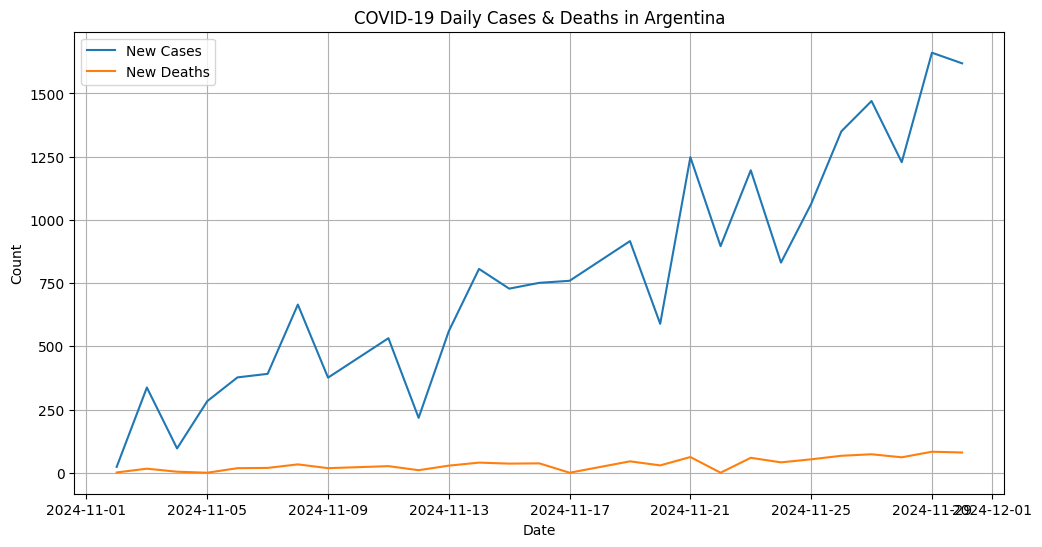

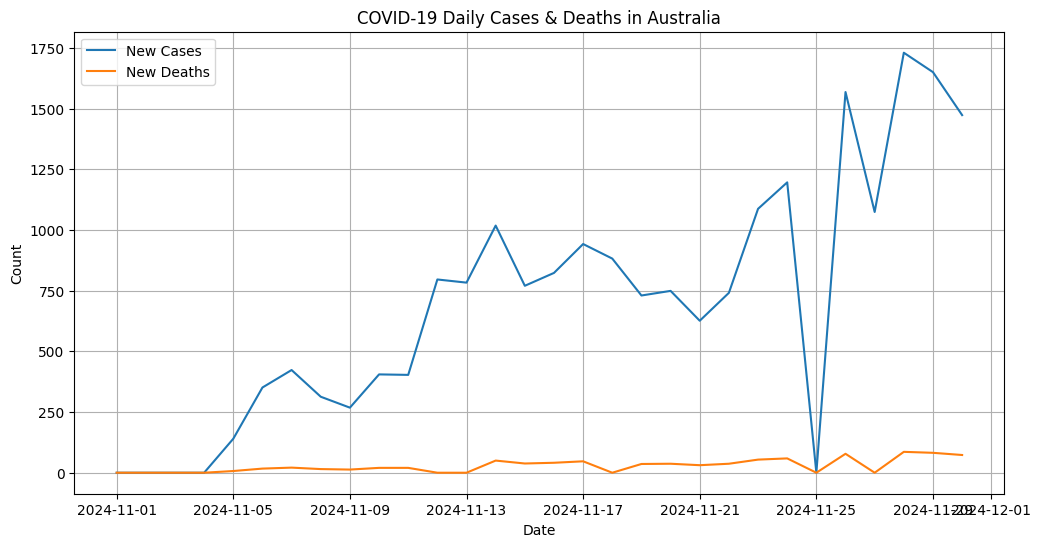

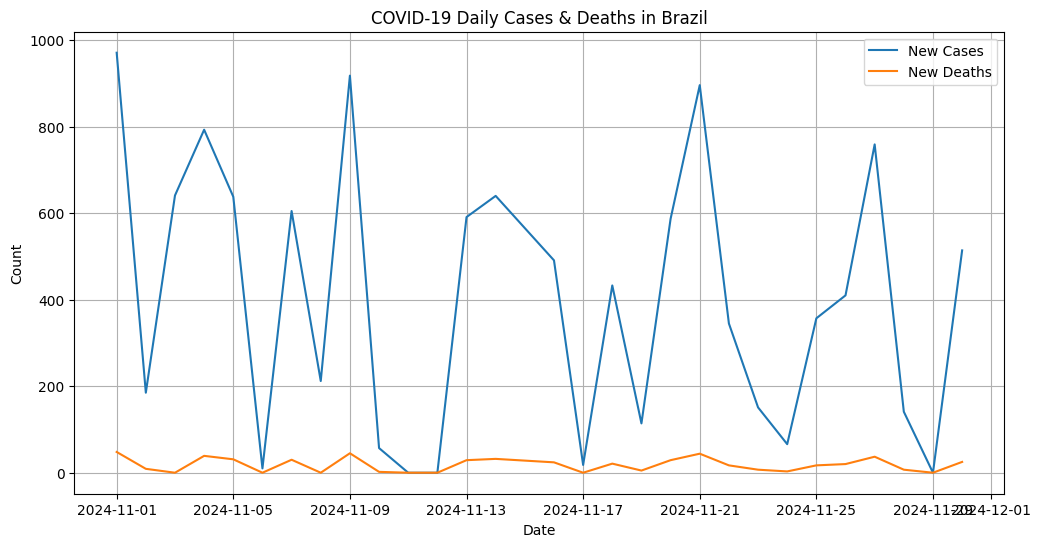

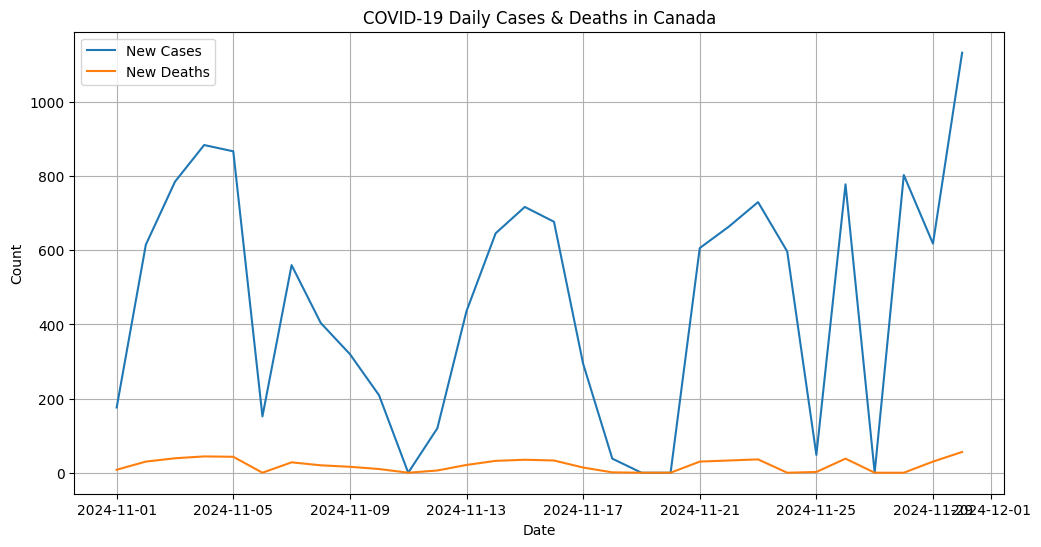

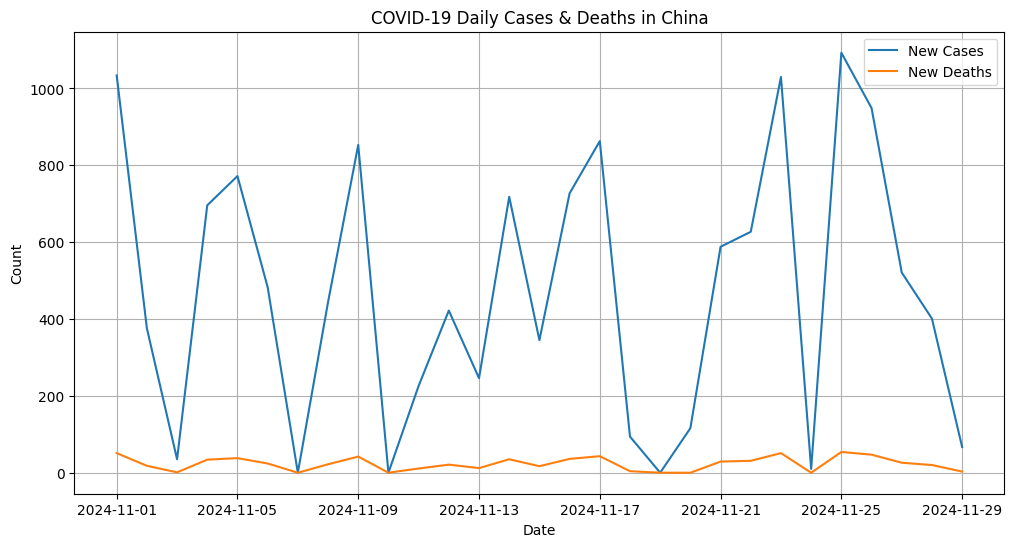

In [57]:
def plot_daily_cases_deaths(country_name, dataframe):
    """
    Generates a line plot of daily new COVID-19 cases and deaths for a given country.

    Args:
        country_name (str): The name of the country to plot.
        dataframe (pd.DataFrame): The DataFrame containing the COVID-19 data.
    """
    country_df = dataframe[dataframe['country'] == country_name].copy()

    if country_df.empty:
        print(f"No data found for {country_name}")
        return

    plt.figure(figsize=(12, 6))
    plt.plot(country_df['date'], country_df['new_cases'], label='New Cases')
    plt.plot(country_df['date'], country_df['new_deaths'], label='New Deaths')
    plt.title(f'COVID-19 Daily Cases & Deaths in {country_name}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()

# Get the list of unique countries
unique_countries = df_filtered['country'].unique()

# Loop through each country and generate the plot
for country in unique_countries:
    plot_daily_cases_deaths(country, df_filtered)


##  2. Bar Chart: Top Countries by Total Cases

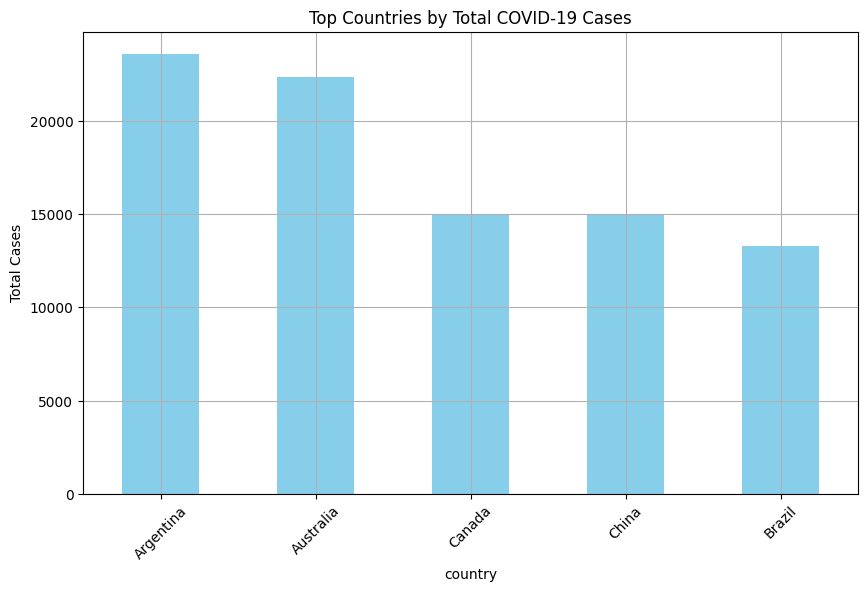

In [58]:
total_cases = df_filtered.groupby('country')['new_cases'].sum().sort_values(ascending=False).head()

plt.figure(figsize=(10,6))
total_cases.plot(kind='bar', color='skyblue')
plt.title('Top Countries by Total COVID-19 Cases')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##  3. Line Chart: Vaccination Over Time for a Country

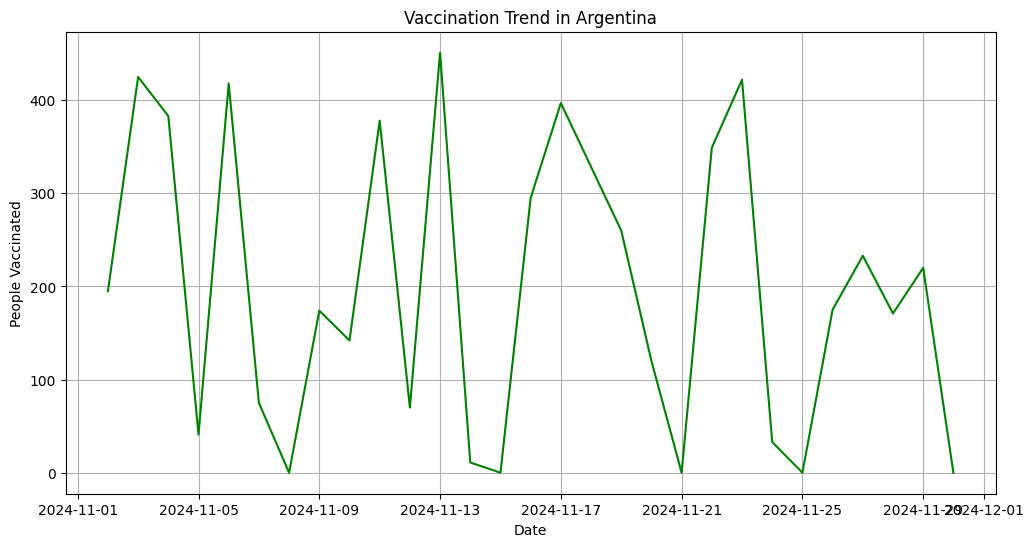

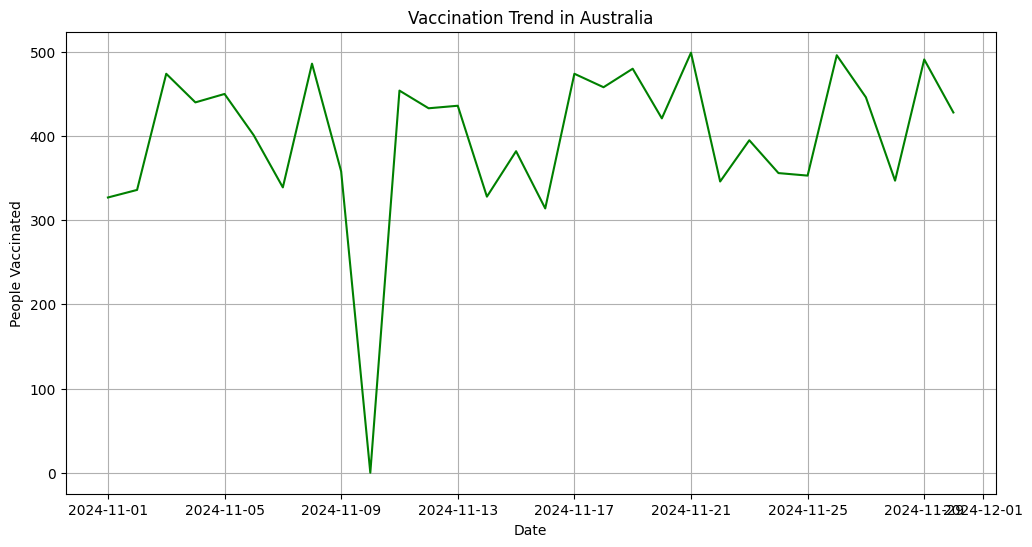

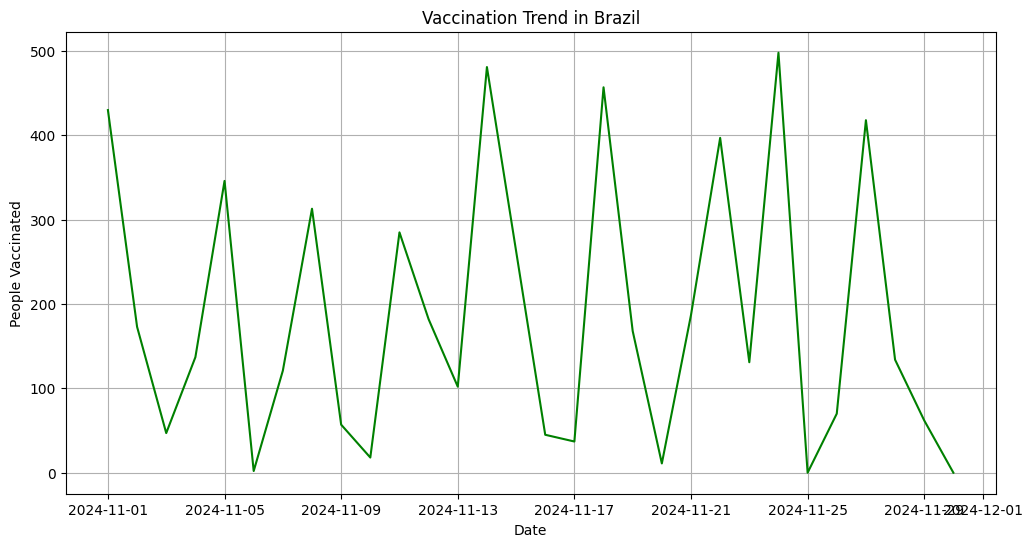

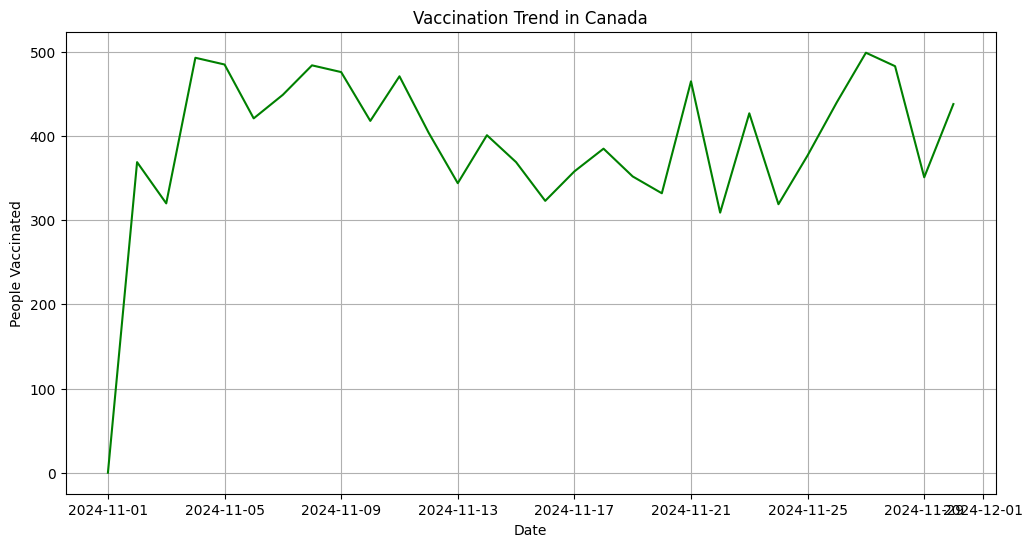

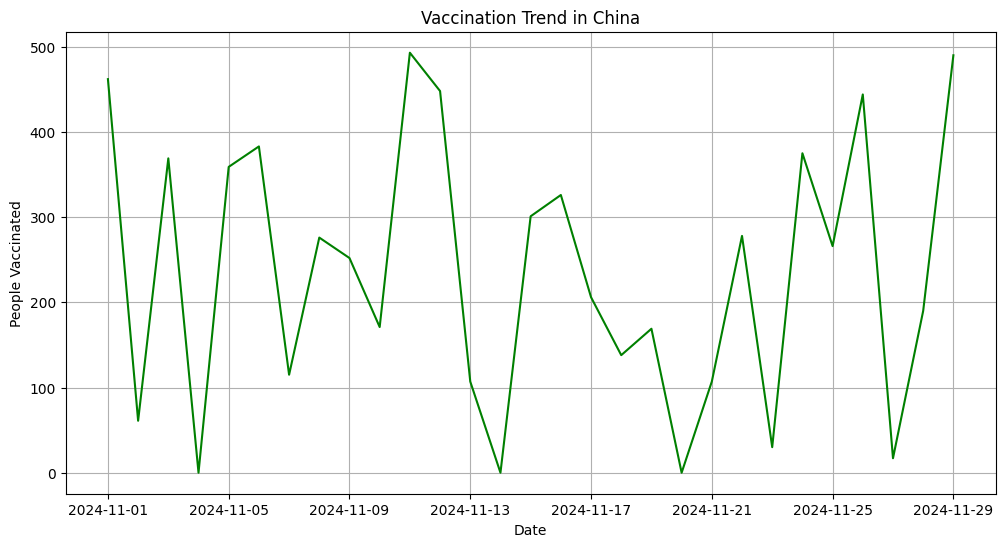

In [62]:
# Get the list of unique countries from the filtered DataFrame
unique_countries = df_filtered['country'].unique()

# Loop through each country and generate a vaccination trend plot
for country in unique_countries:
    country_df = df_filtered[df_filtered['country'] == country].copy()

    if country_df.empty:
        print(f"No data found for {country}")
        continue

    plt.figure(figsize=(12, 6))
    plt.plot(country_df['date'], country_df['vaccinated'], color='green')
    plt.title(f'Vaccination Trend in {country}')
    plt.xlabel('Date')
    plt.ylabel('People Vaccinated')
    plt.grid(True)
    plt.show()

##  4. Scatter Plot: Vaccinated vs New Cases

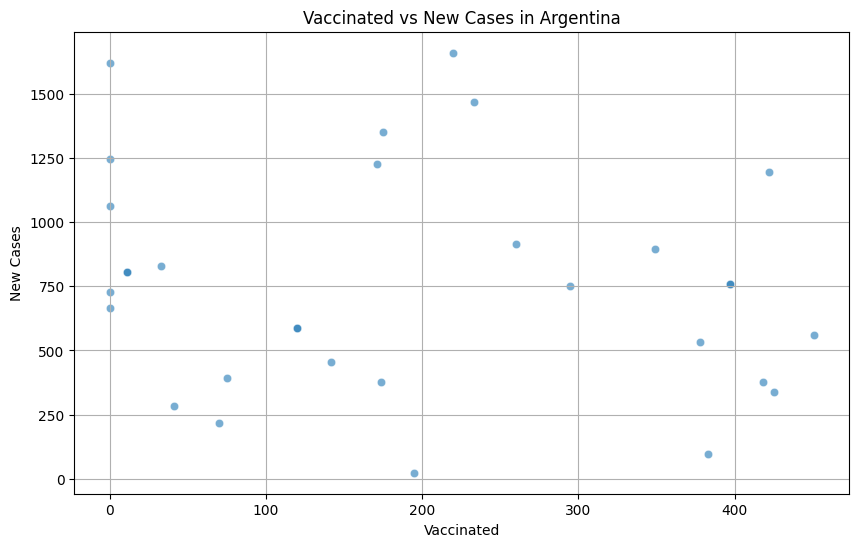

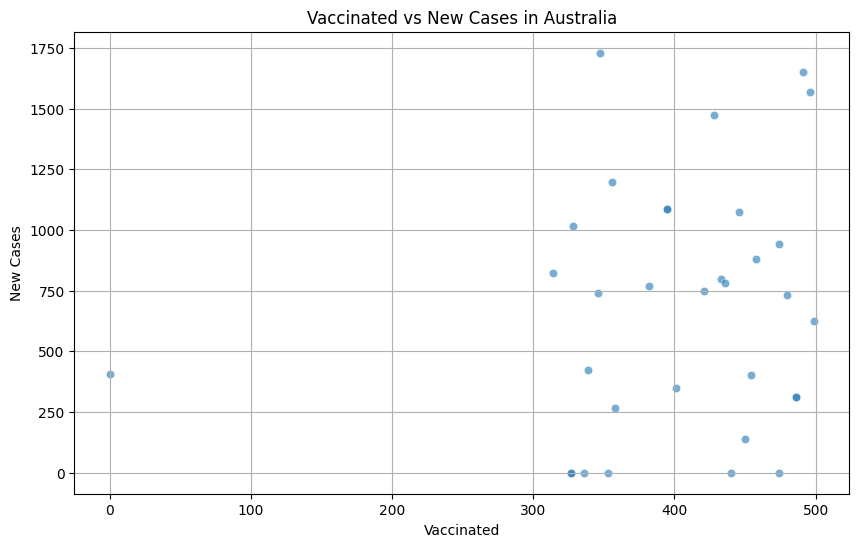

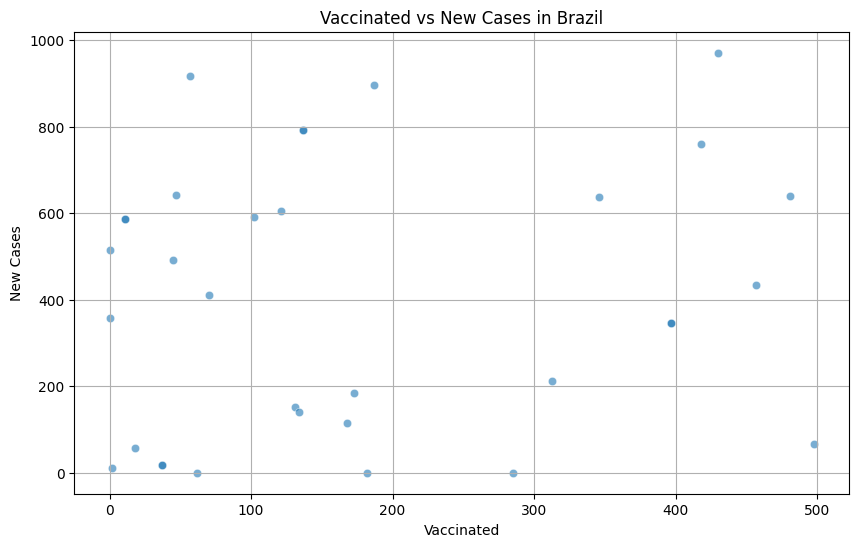

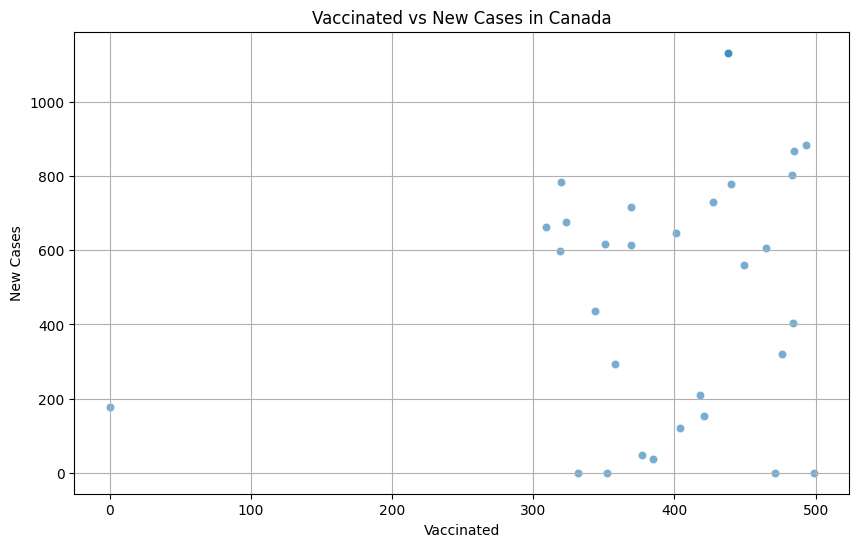

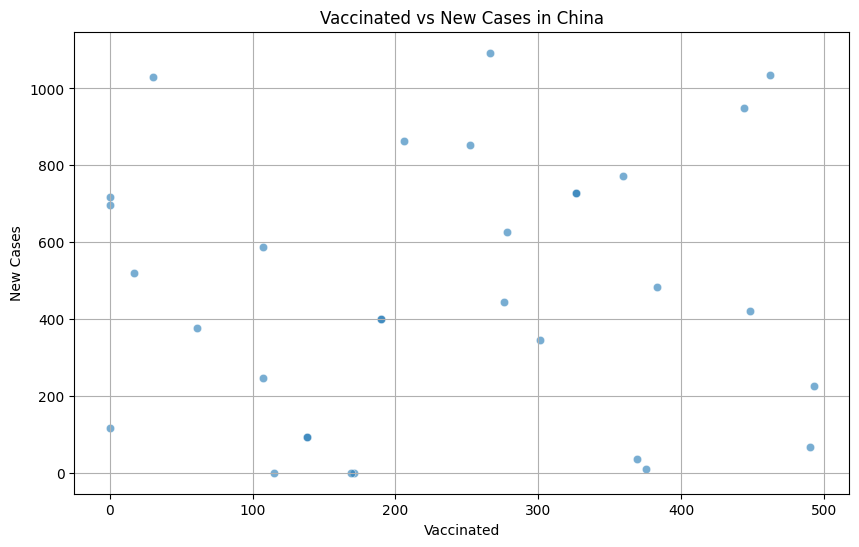

In [63]:
# Get the list of unique countries
unique_countries = df_filtered['country'].unique()

# Loop through each country and generate the scatter plot
for country in unique_countries:
    country_df = df_filtered[df_filtered['country'] == country].copy()

    if country_df.empty:
        print(f"No data found for {country}")
        continue

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=country_df, x='vaccinated', y='new_cases', alpha=0.6)
    plt.title(f'Vaccinated vs New Cases in {country}')
    plt.xlabel('Vaccinated')
    plt.ylabel('New Cases')
    plt.grid(True)
    plt.show()

### cumulative cases, deaths, and vaccinations by country

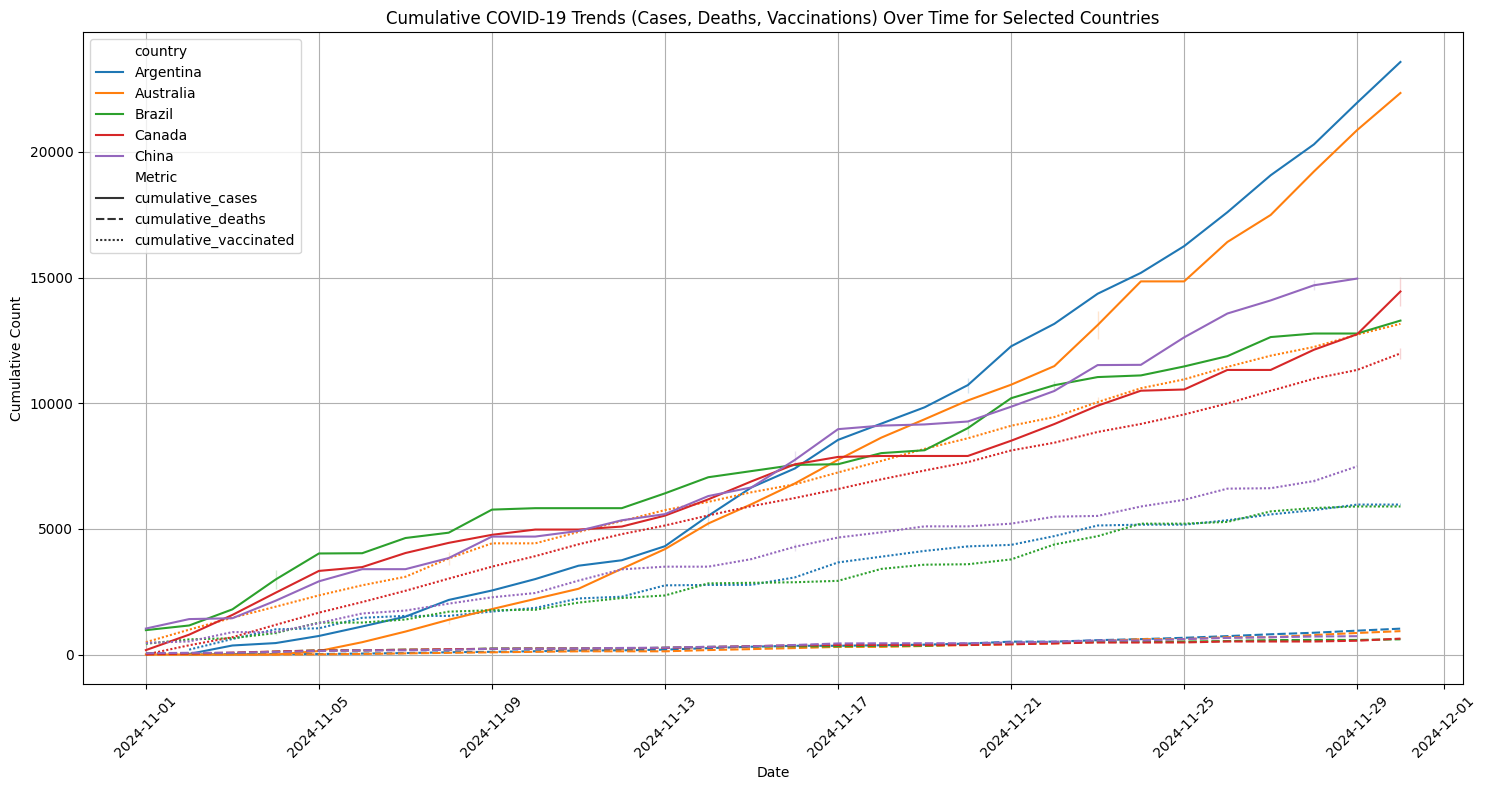

In [53]:


# Select a few countries for visualization
selected_countries = df_filtered['country'].unique()

# Filter the DataFrame for selected countries
df_selected = df_filtered[df_filtered['country'].isin(selected_countries)].copy()

# Melt the DataFrame to long format for easier plotting with seaborn
df_melted = df_selected.melt(id_vars=['date', 'country'], value_vars=['cumulative_cases', 'cumulative_deaths', 'cumulative_vaccinated'],
                             var_name='Metric', value_name='Count')

# Create line plots for cumulative cases, deaths, and vaccinations by country
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_melted, x='date', y='Count', hue='country', style='Metric')
plt.title('Cumulative COVID-19 Trends (Cases, Deaths, Vaccinations) Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total Cumulative COVID-19 Cases, Deaths, and Vaccinations by Country

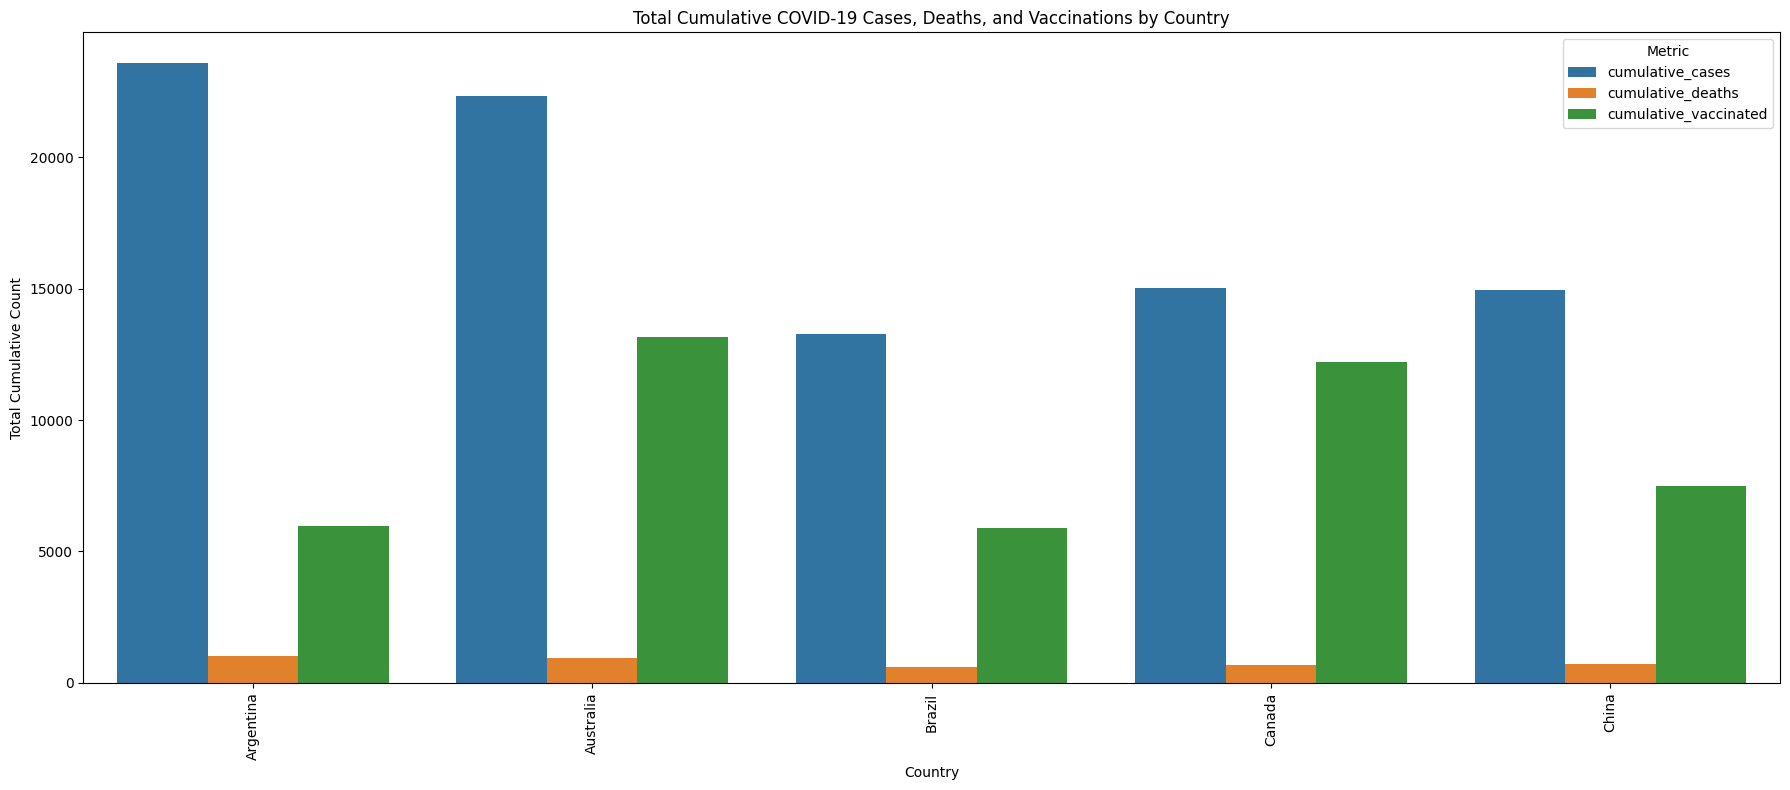

In [54]:
# Calculate the latest cumulative figures for each country
latest_cumulative_df = df.groupby('country').agg({
    'cumulative_cases': 'max',
    'cumulative_deaths': 'max',
    'cumulative_vaccinated': 'max'
}).reset_index()

# Melt the DataFrame to long format for easier plotting
latest_cumulative_melted = latest_cumulative_df.melt(id_vars='country', value_vars=['cumulative_cases', 'cumulative_deaths', 'cumulative_vaccinated'],
                                                     var_name='Metric', value_name='Total_Count')

# Create bar plots for total cumulative cases, deaths, and vaccinations by country
plt.figure(figsize=(18, 8))
sns.barplot(data=latest_cumulative_melted, x='country', y='Total_Count', hue='Metric')
plt.title('Total Cumulative COVID-19 Cases, Deaths, and Vaccinations by Country')
plt.xlabel('Country')
plt.ylabel('Total Cumulative Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Cumulative Cases vs. Cumulative Vaccinations by Country

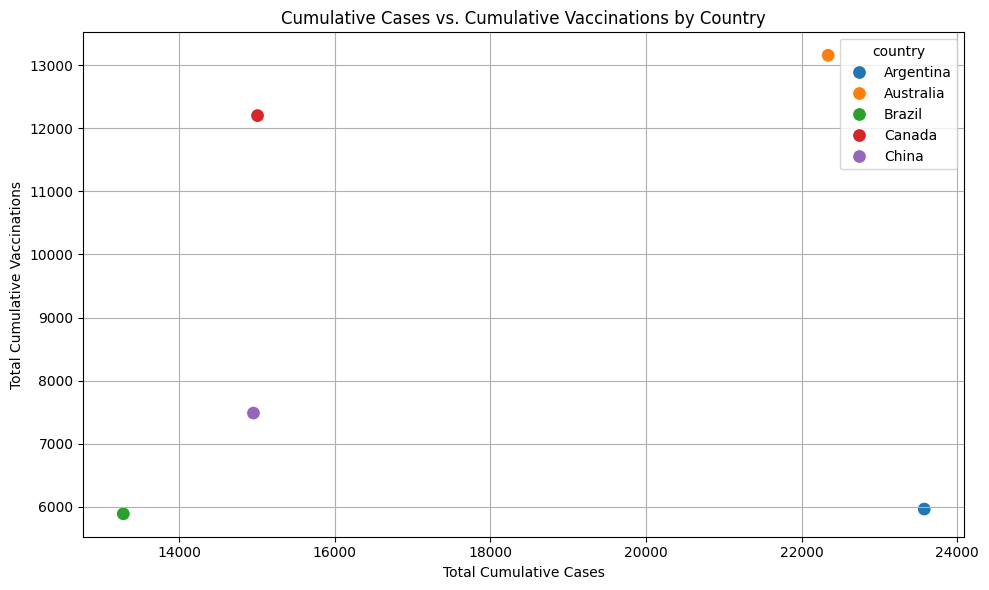

In [55]:
# Create a scatter plot to explore the relationship between Cumulative Cases and Cumulative Vaccinated
plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest_cumulative_df, x='cumulative_cases', y='cumulative_vaccinated', hue='country', s=100) # s is for dot size
plt.title('Cumulative Cases vs. Cumulative Vaccinations by Country')
plt.xlabel('Total Cumulative Cases')
plt.ylabel('Total Cumulative Vaccinations')
plt.grid(True)
plt.tight_layout()
plt.show()

#Insights:


1. Top Countries by Total Cases:

  - Argentina and Australia reported the highest total COVID-19 cases among the listed countries.
  - Brazil, Canada, China, and Argentina follow, with Argentina leading significantly.

2. Cumulative Trends Over Time:

  - Argentina shows the steepest increase in cumulative cases, deaths, and vaccinations, indicating a significant impact of the pandemic and vaccination campaigns over time.
  - The cumulative counts for cases, deaths, and vaccinations are rising steadily in all countries, reflecting ongoing pandemic dynamics.

3. Total Cumulative Counts:

  - Argentina has the highest total cases and deaths.
  - Brazil and China have comparatively lower total counts but show consistent upward trends.

4. Vaccination vs. Cases Relationship:

  - Australia has the highest cumulative vaccinations but relatively fewer cases compared to other countries, suggesting effective vaccination efforts, possibly contributing to controlling the spread.
  - China, with the highest total cases, has also accumulated the most vaccinations, indicating efforts to immunize a large population.


# Summary:

The analysis highlights the varying impact of COVID-19 across different countries, with Argentina experiencing the highest case and death counts, possibly due to demographic, healthcare system differences, or reporting practices. Countries like Australia, with high vaccination rates, show some success in controlling the pandemic's severity. The data underscores the importance of vaccination campaigns and their role in managing COVID-19's impact, as well as the value of tracking trends over time to inform public health responses.